 # Sistema de Reconocimiento Facial con OpenCV

## 1. Importación de librerías

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from tkinter import filedialog
from tkinter import Tk
import warnings
warnings.filterwarnings('ignore')

print("✅ Librerías importadas correctamente")


✅ Librerías importadas correctamente


## 2. Funciones auxiliares para manejo de archivos

In [2]:
def seleccionar_imagen(titulo="Seleccionar imagen"):
    """
    Abre un diálogo para seleccionar una imagen
    """
    root = Tk()
    root.withdraw()  # Ocultar ventana principal
    root.attributes('-topmost', True)  # Asegurar que el diálogo aparezca al frente

    archivo = filedialog.askopenfilename(
        title=titulo,
        filetypes=[
            ("Archivos de imagen", "*.jpg *.jpeg *.png *.bmp *.gif"),
            ("Todos los archivos", "*.*")
        ]
    )
    root.destroy()
    return archivo

def cargar_imagen(ruta_imagen):
    """
    Carga una imagen desde una ruta específica
    """
    if not ruta_imagen:
        print("❌ No se seleccionó ninguna imagen")
        return None

    imagen = cv2.imread(ruta_imagen)
    if imagen is None:
        print(f"❌ Error: No se pudo cargar la imagen desde {ruta_imagen}")
        return None

    print(f"✅ Imagen cargada correctamente: {os.path.basename(ruta_imagen)}")
    return imagen, ruta_imagen


# PARTE 1: ENTRENAMIENTO DE MODELO


## 3. Cargar imagen de referencia

In [3]:
print("📤 Por favor, selecciona tu imagen de referencia:")
ruta_imagen_ref = seleccionar_imagen("Seleccionar imagen de referencia")

if ruta_imagen_ref:
    resultado = cargar_imagen(ruta_imagen_ref)
    if resultado:
        imagen_color, nombre_archivo = resultado
    else:
        imagen_color = None
else:
    imagen_color = None
    print("❌ No se seleccionó ninguna imagen")


📤 Por favor, selecciona tu imagen de referencia:
✅ Imagen cargada correctamente: luidsa2XD.png


## 4. Convertir imagen a escala de grises

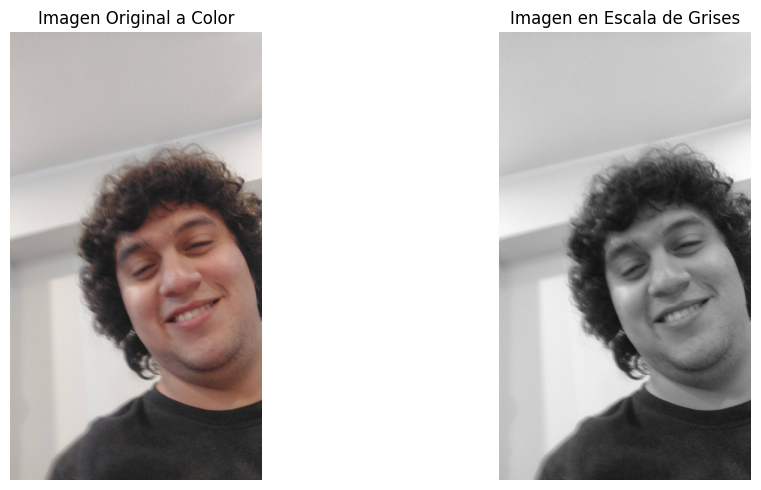


📊 Dimensiones de la imagen a color:
Ancho: 1792 píxeles
Alto: 3184 píxeles
Canales: 3

📊 Dimensiones de la imagen en escala de grises:
Ancho: 1792 píxeles
Alto: 3184 píxeles
Canales: 1


In [4]:
if imagen_color is not None:
    # Convertir la imagen a escala de grises
    imagen_gris = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2GRAY)

    # Convertir BGR a RGB para visualización correcta con matplotlib
    imagen_color_rgb = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB)

    # Crear una figura con dos subplots para mostrar ambas imágenes
    plt.figure(figsize=(12, 5))

    # Mostrar la imagen original a color
    plt.subplot(1, 2, 1)
    plt.imshow(imagen_color_rgb)
    plt.title("Imagen Original a Color")
    plt.axis("off")

    # Mostrar la imagen en escala de grises
    plt.subplot(1, 2, 2)
    plt.imshow(imagen_gris, cmap="gray")
    plt.title("Imagen en Escala de Grises")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

    # Imprimir las dimensiones de ambas imágenes
    print("\n📊 Dimensiones de la imagen a color:")
    print(f"Ancho: {imagen_color.shape[1]} píxeles")
    print(f"Alto: {imagen_color.shape[0]} píxeles")
    print(f"Canales: {imagen_color.shape[2]}")

    print("\n📊 Dimensiones de la imagen en escala de grises:")
    print(f"Ancho: {imagen_gris.shape[1]} píxeles")
    print(f"Alto: {imagen_gris.shape[0]} píxeles")
    print(f"Canales: 1")


## 5. Eliminación de ruido

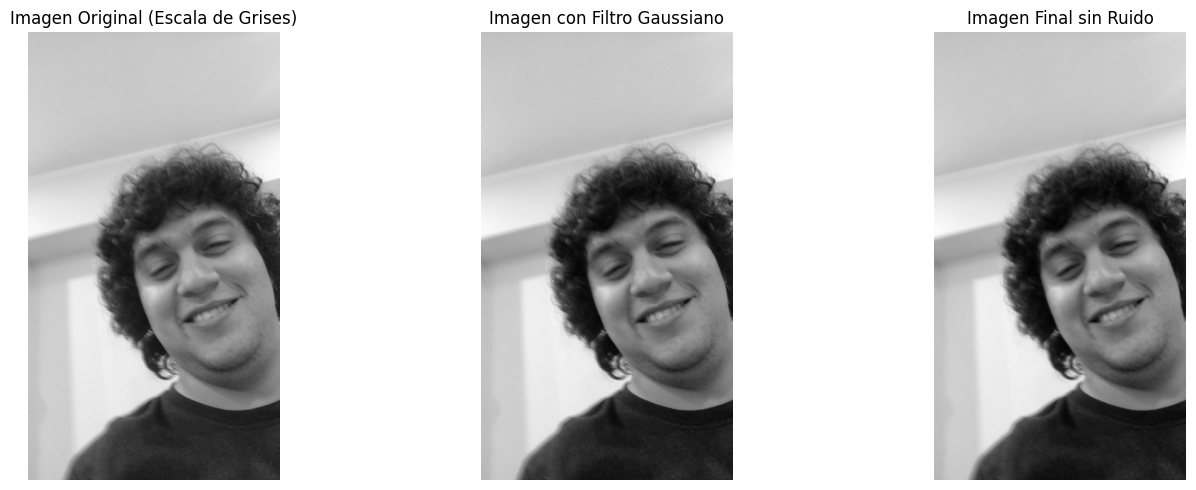

✅ Paso 1 completado: Conversión a escala de grises
✅ Paso 2 completado: Eliminación de ruido


In [5]:
if 'imagen_gris' in locals() and imagen_gris is not None:
    # Normalizar los valores de los píxeles al rango [0, 1]
    imagen_normalizada = imagen_gris.astype(np.float32) / 255.0

    # 1. Aplicar filtro Gaussiano para eliminar ruido
    imagen_gaussiana = cv2.GaussianBlur(imagen_gris, (5, 5), 0)

    # 2. Aplicar filtro bilateral para preservar bordes mientras elimina ruido
    imagen_sin_ruido = cv2.bilateralFilter(imagen_gaussiana, 9, 75, 75)

    # Mostrar el proceso de eliminación de ruido
    plt.figure(figsize=(15, 5))

    # Imagen original en escala de grises
    plt.subplot(1, 3, 1)
    plt.imshow(imagen_gris, cmap='gray')
    plt.title("Imagen Original (Escala de Grises)")
    plt.axis("off")

    # Imagen con filtro Gaussiano
    plt.subplot(1, 3, 2)
    plt.imshow(imagen_gaussiana, cmap='gray')
    plt.title("Imagen con Filtro Gaussiano")
    plt.axis("off")

    # Imagen final sin ruido
    plt.subplot(1, 3, 3)
    plt.imshow(imagen_sin_ruido, cmap='gray')
    plt.title("Imagen Final sin Ruido")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

    print("✅ Paso 1 completado: Conversión a escala de grises")
    print("✅ Paso 2 completado: Eliminación de ruido")


## 6. Detección de rostros

🔍 Detectando rostros en la imagen...
✅ Se detectaron 1 rostro(s)


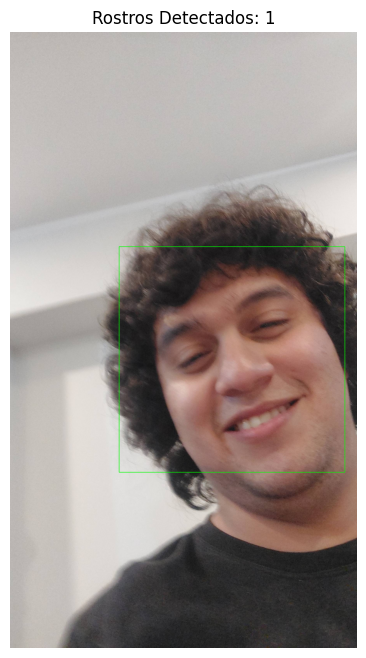

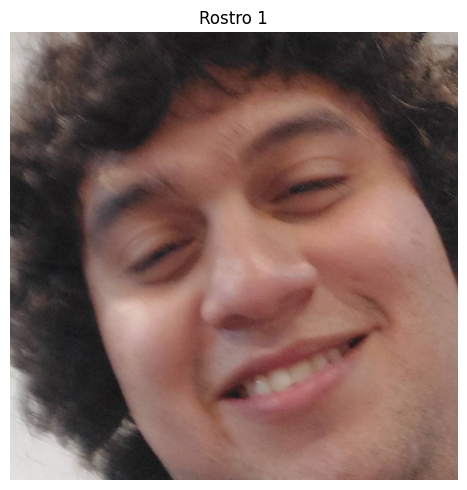

✅ Paso 3 completado: Detección de rostros


In [6]:
if imagen_color is not None and 'imagen_sin_ruido' in locals():
    # Cargar el clasificador Haar Cascade para detección de rostros
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    print("🔍 Detectando rostros en la imagen...")

    # Detectar rostros en la imagen en escala de grises
    rostros_detectados = face_cascade.detectMultiScale(
        imagen_sin_ruido,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30)
    )

    if len(rostros_detectados) == 0:
        print("❌ No se detectaron rostros en la imagen")
    else:
        print(f"✅ Se detectaron {len(rostros_detectados)} rostro(s)")

        # Crear una copia de la imagen para dibujar rectángulos
        imagen_con_rostros = imagen_color.copy()

        # Dibujar rectángulos alrededor de cada rostro detectado
        for (x, y, w, h) in rostros_detectados:
            cv2.rectangle(imagen_con_rostros, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Convertir a RGB para visualización
        imagen_con_rostros_rgb = cv2.cvtColor(imagen_con_rostros, cv2.COLOR_BGR2RGB)

        # Mostrar la imagen con rostros detectados
        plt.figure(figsize=(10, 8))
        plt.imshow(imagen_con_rostros_rgb)
        plt.title(f"Rostros Detectados: {len(rostros_detectados)}")
        plt.axis("off")
        plt.show()

        # Extraer y mostrar cada rostro detectado individualmente
        rostros_extraidos = []

        plt.figure(figsize=(15, 5))
        for i, (x, y, w, h) in enumerate(rostros_detectados):
            # Extraer la región del rostro
            rostro = imagen_color_rgb[y:y+h, x:x+w]
            rostros_extraidos.append(rostro)

            plt.subplot(1, len(rostros_detectados), i+1)
            plt.imshow(rostro)
            plt.title(f"Rostro {i+1}")
            plt.axis("off")

        plt.tight_layout()
        plt.show()

        print("✅ Paso 3 completado: Detección de rostros")


## 7. Extracción de características faciales

🧬 Extrayendo características faciales...
✅ Se extrajeron 1024 características
📊 Composición de características:
   - Píxeles: 512 valores
   - Histograma: 256 valores
   - Textura LBP: 256 valores
   - Total: 1024 valores


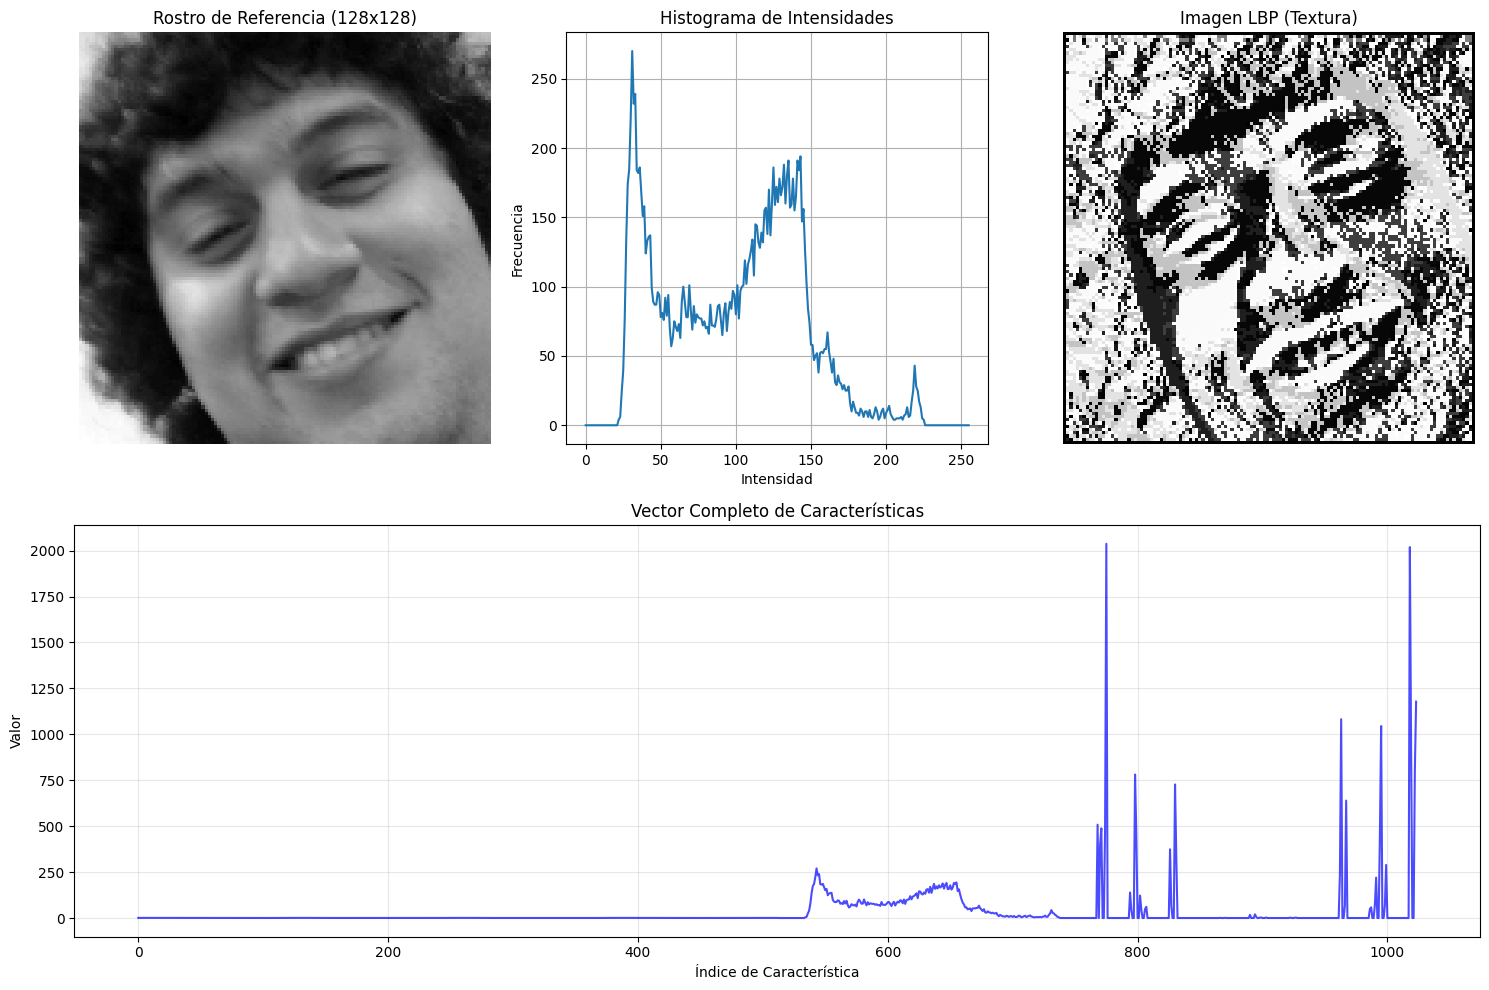


🔢 Muestra de características (primeros 10 valores):
Característica 1: 0.784314
Característica 2: 0.772549
Característica 3: 0.776471
Característica 4: 0.776471
Característica 5: 0.760784
Característica 6: 0.705882
Característica 7: 0.698039
Característica 8: 0.682353
Característica 9: 0.682353
Característica 10: 0.615686
✅ Paso 4 completado: Extracción de características faciales


In [7]:
def calcular_lbp(imagen, radio=1, n_puntos=8):
    """Calcula Local Binary Pattern para características de textura"""
    lbp = np.zeros_like(imagen)
    for i in range(radio, imagen.shape[0] - radio):
        for j in range(radio, imagen.shape[1] - radio):
            centro = imagen[i, j]
            valor_lbp = 0
            for k in range(n_puntos):
                angulo = 2 * np.pi * k / n_puntos
                x_coord = int(i + radio * np.cos(angulo))
                y_coord = int(j + radio * np.sin(angulo))
                if imagen[x_coord, y_coord] >= centro:
                    valor_lbp += 2 ** k
            lbp[i, j] = valor_lbp
    return lbp


if 'rostros_detectados' in locals() and len(rostros_detectados) > 0:
    print("🧬 Extrayendo características faciales...")

    # Tomar el primer rostro detectado como referencia
    x, y, w, h = rostros_detectados[0]
    rostro_referencia = imagen_sin_ruido[y:y + h, x:x + w]

    # Redimensionar el rostro a un tamaño estándar para consistencia
    tamaño_estandar = (128, 128)
    rostro_redimensionado = cv2.resize(rostro_referencia, tamaño_estandar)

    # Método 1: Usar el rostro completo como vector de características
    caracteristicas_pixel = rostro_redimensionado.flatten().astype(np.float32) / 255.0

    # Método 2: Calcular histograma de la imagen como características
    histograma = cv2.calcHist([rostro_redimensionado], [0], None, [256], [0, 256])
    caracteristicas_histograma = histograma.flatten()

    # Método 3: Usar características de textura (LBP)
    lbp_imagen = calcular_lbp(rostro_redimensionado)
    histograma_lbp = cv2.calcHist([lbp_imagen.astype(np.uint8)], [0], None, [256], [0, 256])
    caracteristicas_textura = histograma_lbp.flatten()

    # Combinar todas las características
    caracteristicas_referencia = np.concatenate([
        caracteristicas_pixel[:512],  # Primeros 512 píxeles
        caracteristicas_histograma,  # 256 valores del histograma
        caracteristicas_textura  # 256 valores de textura LBP
    ])

    print(f"✅ Se extrajeron {len(caracteristicas_referencia)} características")
    print(f"📊 Composición de características:")
    print(f"   - Píxeles: 512 valores")
    print(f"   - Histograma: 256 valores")
    print(f"   - Textura LBP: 256 valores")
    print(f"   - Total: {len(caracteristicas_referencia)} valores")

    # Mostrar visualizaciones de las características
    plt.figure(figsize=(15, 10))

    # Rostro redimensionado
    plt.subplot(2, 3, 1)
    plt.imshow(rostro_redimensionado, cmap='gray')
    plt.title("Rostro de Referencia (128x128)")
    plt.axis("off")

    # Histograma de intensidades
    plt.subplot(2, 3, 2)
    plt.plot(caracteristicas_histograma)
    plt.title("Histograma de Intensidades")
    plt.xlabel("Intensidad")
    plt.ylabel("Frecuencia")
    plt.grid(True)

    # Imagen LBP
    plt.subplot(2, 3, 3)
    plt.imshow(lbp_imagen, cmap='gray')
    plt.title("Imagen LBP (Textura)")
    plt.axis("off")

    # Vector de características completo
    plt.subplot(2, 1, 2)
    plt.plot(caracteristicas_referencia, 'b-', alpha=0.7)
    plt.title("Vector Completo de Características")
    plt.xlabel("Índice de Característica")
    plt.ylabel("Valor")
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Mostrar muestra de características
    print("\n🔢 Muestra de características (primeros 10 valores):")
    for i, valor in enumerate(caracteristicas_referencia[:10]):
        print(f"Característica {i + 1}: {valor:.6f}")

    print("✅ Paso 4 completado: Extracción de características faciales")


## 8. Crear y guardar el modelo

In [8]:
if 'caracteristicas_referencia' in locals():
    # Pedir el nombre de la persona
    nombre_persona = input("Ingresa el nombre de la persona: ")

    # Crear el modelo con la información extraída
    modelo_facial = {
        'caracteristicas': caracteristicas_referencia,
        'nombre_persona': nombre_persona,
        'umbral_similitud': 0.75,
        'imagen_referencia': nombre_archivo,
        'rostro_referencia': rostro_redimensionado,
        'metodo': 'opencv_tradicional'
    }

    # Crear directorio para modelos si no existe
    if not os.path.exists('modelos'):
        os.makedirs('modelos')

    # Guardar el modelo en un archivo pickle
    nombre_modelo = f"modelos/modelo_facial_{nombre_persona.replace(' ', '_').lower()}.pkl"
    with open(nombre_modelo, 'wb') as archivo:
        pickle.dump(modelo_facial, archivo)

    print(f"💾 Modelo guardado como: {nombre_modelo}")
    print(f"👤 Persona: {nombre_persona}")
    print(f"🎯 Umbral de similitud: {modelo_facial['umbral_similitud']}")
    print(f"🔧 Método: OpenCV tradicional")
    print("✅ Entrenamiento completado: Modelo creado y guardado")
else:
    print("❌ No se pudo crear el modelo - no hay características extraídas")


💾 Modelo guardado como: modelos/modelo_facial_luisda.pkl
👤 Persona: Luisda
🎯 Umbral de similitud: 0.75
🔧 Método: OpenCV tradicional
✅ Entrenamiento completado: Modelo creado y guardado


# PARTE 2: RECONOCIMIENTO CON MODELOS EXISTENTES


## 9. Funciones de reconocimiento

In [9]:
def cargar_modelo(ruta_modelo=None):
    """Carga un modelo guardado desde archivo"""
    if ruta_modelo is None:
        print("📂 Abriendo diálogo para seleccionar modelo...")
        try:
            root = Tk()
            root.withdraw()
            root.attributes('-topmost', True)  # Forzar ventana al frente

            # Verificar si existe la carpeta modelos
            directorio_inicial = "modelos" if os.path.exists("modelos") else "."

            ruta_modelo = filedialog.askopenfilename(
                title="Seleccionar modelo facial (.pkl)",
                filetypes=[("Archivos pickle", "*.pkl"), ("Todos los archivos", "*.*")],
                initialdir=directorio_inicial
            )
            root.destroy()

        except Exception as e:
            print(f"❌ Error abriendo diálogo: {e}")
            return None

    if not ruta_modelo:
        print("❌ No se seleccionó ningún modelo")
        return None

    if not os.path.exists(ruta_modelo):
        print(f"❌ El archivo no existe: {ruta_modelo}")
        return None

    try:
        with open(ruta_modelo, 'rb') as archivo:
            modelo = pickle.load(archivo)
        print(f"✅ Modelo cargado: {os.path.basename(ruta_modelo)}")
        print(f"👤 Persona: {modelo['nombre_persona']}")
        print(f"🎯 Umbral: {modelo['umbral_similitud']}")
        return modelo
    except Exception as e:
        print(f"❌ Error cargando modelo: {e}")
        return None

def comparar_imagen_con_modelo(modelo_facial=None):
    """Compara una nueva imagen con el modelo cargado"""

    # Cargar modelo si no se proporciona
    if modelo_facial is None:
        modelo_facial = cargar_modelo()
        if modelo_facial is None:
            return None, None

    # Cargar clasificador de rostros
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Seleccionar imagen para comparar
    print("\n📤 Selecciona la imagen que quieres comparar:")
    ruta_imagen_test = seleccionar_imagen("Seleccionar imagen para reconocimiento")

    if not ruta_imagen_test:
        print("❌ No se seleccionó ninguna imagen")
        return None, None

    # Cargar imagen
    imagen_test = cv2.imread(ruta_imagen_test)
    if imagen_test is None:
        print("❌ Error: No se pudo cargar la imagen")
        return None, None

    print(f"✅ Imagen cargada: {os.path.basename(ruta_imagen_test)}")

    # Procesar imagen
    imagen_test_gris = cv2.cvtColor(imagen_test, cv2.COLOR_BGR2GRAY)
    imagen_test_sin_ruido = cv2.bilateralFilter(cv2.GaussianBlur(imagen_test_gris, (5, 5), 0), 9, 75, 75)

    # Detectar rostros
    print("🔍 Detectando rostros...")
    rostros = face_cascade.detectMultiScale(imagen_test_sin_ruido, 1.1, 5, minSize=(30, 30))

    if len(rostros) == 0:
        print("❌ No se detectaron rostros en la imagen")
        return None, None

    print(f"✅ Se detectaron {len(rostros)} rostro(s)")

    # Extraer características del primer rostro
    x, y, w, h = rostros[0]
    rostro = imagen_test_sin_ruido[y:y+h, x:x+w]
    rostro_redimensionado = cv2.resize(rostro, (128, 128))

    # Extraer características
    caracteristicas_pixel = rostro_redimensionado.flatten().astype(np.float32) / 255.0
    histograma = cv2.calcHist([rostro_redimensionado], [0], None, [256], [0, 256]).flatten()
    lbp_img = calcular_lbp(rostro_redimensionado)
    histograma_lbp = cv2.calcHist([lbp_img.astype(np.uint8)], [0], None, [256], [0, 256]).flatten()

    caracteristicas = np.concatenate([
        caracteristicas_pixel[:512],
        histograma,
        histograma_lbp
    ])

    print("🧬 Características extraídas correctamente")

    # Calcular similitud
    similitud_corr = np.corrcoef(modelo_facial['caracteristicas'], caracteristicas)[0, 1]
    if np.isnan(similitud_corr):
        similitud_corr = 0.0

    distancia = np.linalg.norm(modelo_facial['caracteristicas'] - caracteristicas)
    similitud_dist = max(0, 1 - (distancia / np.sqrt(len(caracteristicas))))
    similitud = (abs(similitud_corr) + similitud_dist) / 2

    # Determinar resultado
    es_misma_persona = similitud >= modelo_facial['umbral_similitud']

    # Mostrar resultados visuales
    imagen_test_rgb = cv2.cvtColor(imagen_test, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(15, 6))

    # Imagen de referencia
    plt.subplot(1, 3, 1)
    if 'rostro_referencia' in modelo_facial:
        plt.imshow(modelo_facial['rostro_referencia'], cmap='gray')
    else:
        plt.text(0.5, 0.5, 'Imagen de\nReferencia', ha='center', va='center', fontsize=12)
    plt.title(f"Referencia: {modelo_facial['nombre_persona']}")
    plt.axis("off")

    # Imagen de prueba
    plt.subplot(1, 3, 2)
    plt.imshow(imagen_test_rgb)
    plt.title("Imagen de Prueba")
    plt.axis("off")

    # Resultado
    plt.subplot(1, 3, 3)
    resultado_texto = "✅ MISMA PERSONA" if es_misma_persona else "❌ PERSONA DIFERENTE"
    color = 'green' if es_misma_persona else 'red'

    plt.text(0.5, 0.7, resultado_texto, fontsize=16, fontweight='bold',
             ha='center', va='center', color=color, transform=plt.gca().transAxes)
    plt.text(0.5, 0.5, f"Similitud: {similitud:.3f}", fontsize=14,
             ha='center', va='center', transform=plt.gca().transAxes)
    plt.text(0.5, 0.3, f"Umbral: {modelo_facial['umbral_similitud']}", fontsize=12,
             ha='center', va='center', transform=plt.gca().transAxes)
    plt.axis("off")
    plt.title("Resultado")

    plt.tight_layout()
    plt.show()

    # Mostrar rostros extraídos
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    if 'rostro_referencia' in modelo_facial:
        plt.imshow(modelo_facial['rostro_referencia'], cmap='gray')
        plt.title("Rostro de Referencia (128x128)")
    else:
        plt.text(0.5, 0.5, 'No disponible', ha='center', va='center')
        plt.title("Rostro de Referencia")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(rostro_redimensionado, cmap='gray')
    plt.title("Rostro de Prueba (128x128)")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

    # Imprimir resultados detallados
    print(f"\n📊 RESULTADOS DETALLADOS:")
    print(f"Similitud por correlación: {similitud_corr:.4f}")
    print(f"Similitud por distancia: {similitud_dist:.4f}")
    print(f"Similitud promedio: {similitud:.4f}")
    print(f"Umbral configurado: {modelo_facial['umbral_similitud']}")
    print(f"Resultado final: {resultado_texto}")

    if es_misma_persona:
        print(f"🎉 ¡La imagen pertenece a {modelo_facial['nombre_persona']}!")
    else:
        print(f"🚫 La imagen NO pertenece a {modelo_facial['nombre_persona']}")

    return es_misma_persona, similitud


## 10. Función para cambiar umbral

In [10]:
def cambiar_umbral(modelo_facial, nuevo_umbral):
    """Cambia el umbral del modelo y lo guarda"""
    if modelo_facial is None:
        print("❌ Error: Modelo no encontrado")
        return None

    modelo_facial['umbral_similitud'] = nuevo_umbral

    # Guardar modelo actualizado
    nombre_modelo = f"modelos/modelo_facial_{modelo_facial['nombre_persona'].replace(' ', '_').lower()}.pkl"
    with open(nombre_modelo, 'wb') as archivo:
        pickle.dump(modelo_facial, archivo)

    print(f"✅ Umbral cambiado a: {nuevo_umbral}")
    print(f"💾 Modelo actualizado y guardado")

    return modelo_facial


## 11. Ejemplos de uso

### 🔄 Instrucciones de uso:
- **Para entrenar**: Ejecuta las secciones 1-8 secuencialmente
- **Para reconocer**: Ejecuta solo las secciones 1-2 y 9-12
- **Los diálogos de archivos se abren automáticamente**


### 🔍 Verificación previa de modelos


In [11]:
# Celda de verificación antes de ejecutar 11.1
print("🔍 VERIFICANDO DISPONIBILIDAD DE MODELOS...")
print("=" * 50)

# Verificar si existe la carpeta modelos
if os.path.exists('modelos'):
    modelos_disponibles = [f for f in os.listdir('modelos') if f.endswith('.pkl')]
    if modelos_disponibles:
        print(f"✅ Se encontraron {len(modelos_disponibles)} modelos:")
        for modelo in modelos_disponibles:
            print(f"   📄 {modelo}")
        print(f"\n💡 Todo listo para ejecutar la sección 11.1")
    else:
        print("❌ La carpeta 'modelos' existe pero está vacía")
        print("💡 Necesitas crear un modelo primero (secciones 1-8)")
else:
    print("❌ No existe la carpeta 'modelos'")
    print("💡 Ejecuta las secciones 1-8 para crear tu primer modelo")

print("=" * 50)


🔍 VERIFICANDO DISPONIBILIDAD DE MODELOS...
✅ Se encontraron 5 modelos:
   📄 modelo_facial_bryan.pkl
   📄 modelo_facial_charlie.pkl
   📄 modelo_facial_luisda.pkl
   📄 modelo_facial_maqui.pkl
   📄 modelo_facial_samil.pkl

💡 Todo listo para ejecutar la sección 11.1


### 11.1 Cargar modelo y comparar imagen


=== EJEMPLO: Cargar modelo y comparar imagen ===
🔍 Se abrirán diálogos para:
1. Seleccionar un modelo guardado (.pkl)
2. Seleccionar una imagen para comparar
3. Ver el resultado de la comparación

✅ Clasificador Haar Cascade disponible
✅ Función calcular_lbp disponible
📂 Abriendo diálogo para seleccionar modelo...
✅ Modelo cargado: modelo_facial_bryan.pkl
👤 Persona: Bryan
🎯 Umbral: 0.75

📤 Selecciona la imagen que quieres comparar:
✅ Imagen cargada: ZUMAETONCIO.jpg
🔍 Detectando rostros...
✅ Se detectaron 1 rostro(s)
🧬 Características extraídas correctamente


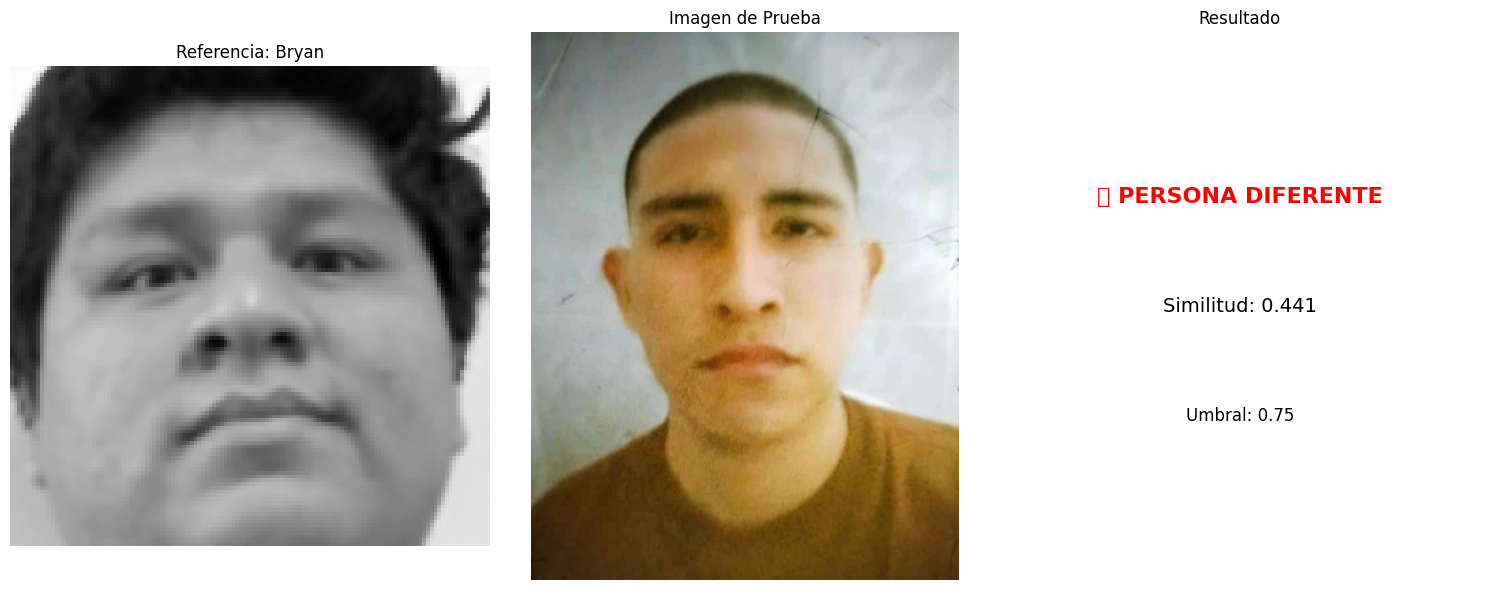

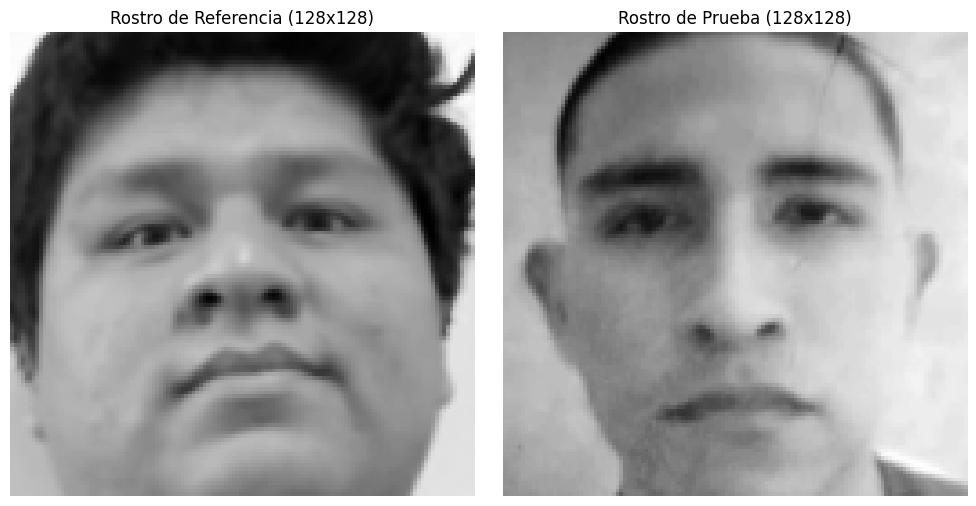


📊 RESULTADOS DETALLADOS:
Similitud por correlación: 0.8813
Similitud por distancia: 0.0000
Similitud promedio: 0.4407
Umbral configurado: 0.75
Resultado final: ❌ PERSONA DIFERENTE
🚫 La imagen NO pertenece a Bryan

✅ Comparación completada
📊 Similitud obtenida: 0.441


In [12]:
# Ejemplo 1: Cargar un modelo existente y comparar
print("=== EJEMPLO: Cargar modelo y comparar imagen ===")
print("🔍 Se abrirán diálogos para:")
print("1. Seleccionar un modelo guardado (.pkl)")
print("2. Seleccionar una imagen para comparar")
print("3. Ver el resultado de la comparación\n")

# Verificar prerrequisitos antes de ejecutar
try:
    # Verificar que las librerías estén disponibles
    test_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    if test_cascade.empty():
        print("❌ Error: No se pudo cargar el clasificador Haar Cascade")
        print("💡 Ejecuta las secciones 1-2 primero")
    else:
        print("✅ Clasificador Haar Cascade disponible")

        # Verificar que la función calcular_lbp esté definida
        if 'calcular_lbp' in globals():
            print("✅ Función calcular_lbp disponible")

            # Realizar comparación - los diálogos se abren automáticamente
            resultado, similitud = comparar_imagen_con_modelo()

            if resultado is not None:
                print(f"\n✅ Comparación completada")
                print(f"📊 Similitud obtenida: {similitud:.3f}")
            else:
                print("\n❌ No se pudo completar la comparación")
        else:
            print("❌ Error: La función calcular_lbp no está definida")
            print("💡 Ejecuta la sección 7 primero para definir esta función")

except Exception as e:
    print(f"❌ Error en la verificación: {e}")
    print("💡 Ejecuta las secciones 1-2 y 7 antes de usar esta función")


### 11.2 Cambiar umbral de un modelo


In [ ]:
# Ejemplo 2: Cambiar el umbral de un modelo
print("=== EJEMPLO: Cambiar umbral del modelo ===")
print("📁 Selecciona un modelo para modificar su umbral:")

# Cargar modelo con diálogo de archivos
modelo_cargado = cargar_modelo()

if modelo_cargado:
    print(f"\n📋 Modelo actual: {modelo_cargado['nombre_persona']}")
    print(f"🎯 Umbral actual: {modelo_cargado['umbral_similitud']}")

    # Pedir nuevo umbral
    nuevo_umbral_str = input("\nIngresa el nuevo umbral (entre 0 y 1, recomendado 0.75): ")

    try:
        nuevo_umbral = float(nuevo_umbral_str)
        if 0 <= nuevo_umbral <= 1:
            modelo_cargado = cambiar_umbral(modelo_cargado, nuevo_umbral)
        else:
            print("❌ Error: El umbral debe estar entre 0 y 1")
    except ValueError:
        print("❌ Error: Ingresa un número válido")
else:
    print("❌ No se cargó ningún modelo")


### 11.3 Listar modelos disponibles




In [13]:
# Ejemplo 3: Ver qué modelos están disponibles
print("=== MODELOS DISPONIBLES ===")

# Verificar si existe la carpeta de modelos
if os.path.exists('modelos'):
    modelos_disponibles = [f for f in os.listdir('modelos') if f.endswith('.pkl')]
    if modelos_disponibles:
        print("📋 Modelos encontrados:")
        for i, modelo in enumerate(modelos_disponibles, 1):
            # Extraer nombre de la persona del nombre del archivo
            nombre_persona = modelo.replace('modelo_facial_', '').replace('.pkl', '').replace('_', ' ').title()
            print(f"   {i}. {modelo} → {nombre_persona}")

        print(f"\n📊 Total: {len(modelos_disponibles)} modelos guardados")
        print("💡 Usa la sección 11.1 para cargar y probar cualquier modelo")
    else:
        print("❌ No hay modelos guardados en la carpeta 'modelos'")
        print("💡 Ejecuta las secciones 1-8 para crear tu primer modelo")
else:
    print("❌ La carpeta 'modelos' no existe")
    print("💡 Se creará automáticamente cuando guardes tu primer modelo")


=== MODELOS DISPONIBLES ===
📋 Modelos encontrados:
   1. modelo_facial_bryan.pkl → Bryan
   2. modelo_facial_charlie.pkl → Charlie
   3. modelo_facial_luisda.pkl → Luisda
   4. modelo_facial_maqui.pkl → Maqui
   5. modelo_facial_samil.pkl → Samil

📊 Total: 5 modelos guardados
💡 Usa la sección 11.1 para cargar y probar cualquier modelo


## 12. Procesamiento por lotes


In [ ]:
def procesar_multiples_imagenes(modelo_facial=None):
    """Procesa múltiples imágenes contra un modelo"""

    # Cargar modelo si no se proporciona
    if modelo_facial is None:
        print("📂 Primero selecciona un modelo:")
        modelo_facial = cargar_modelo()
        if modelo_facial is None:
            return

    # Seleccionar múltiples imágenes
    print("\n📂 Ahora selecciona las imágenes a procesar (puedes seleccionar varias):")
    root = Tk()
    root.withdraw()
    archivos = filedialog.askopenfilenames(
        title="Seleccionar imágenes para procesar",
        filetypes=[("Archivos de imagen", "*.jpg *.jpeg *.png *.bmp"), ("Todos", "*.*")]
    )
    root.destroy()

    if not archivos:
        print("❌ No se seleccionaron imágenes")
        return

    print(f"\n📁 Se seleccionaron {len(archivos)} imágenes")
    print(f"🔍 Procesando contra modelo de: {modelo_facial['nombre_persona']}")

    resultados = []
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    for i, archivo in enumerate(archivos, 1):
        print(f"\n🔄 Procesando {i}/{len(archivos)}: {os.path.basename(archivo)}")

        # Cargar y procesar imagen
        imagen = cv2.imread(archivo)
        if imagen is None:
            print(f"   ❌ Error cargando imagen")
            resultados.append((archivo, None, None))
            continue

        # Procesar imagen
        imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
        imagen_sin_ruido = cv2.bilateralFilter(cv2.GaussianBlur(imagen_gris, (5, 5), 0), 9, 75, 75)

        # Detectar rostros
        rostros = face_cascade.detectMultiScale(imagen_sin_ruido, 1.1, 5, minSize=(30, 30))

        if len(rostros) == 0:
            print(f"   ❌ No se detectaron rostros")
            resultados.append((archivo, None, None))
            continue

        # Extraer características del primer rostro
        x, y, w, h = rostros[0]
        rostro = imagen_sin_ruido[y:y+h, x:x+w]
        rostro_redimensionado = cv2.resize(rostro, (128, 128))

        # Extraer características
        caracteristicas_pixel = rostro_redimensionado.flatten().astype(np.float32) / 255.0
        histograma = cv2.calcHist([rostro_redimensionado], [0], None, [256], [0, 256]).flatten()
        lbp_img = calcular_lbp(rostro_redimensionado)
        histograma_lbp = cv2.calcHist([lbp_img.astype(np.uint8)], [0], None, [256], [0, 256]).flatten()

        caracteristicas = np.concatenate([
            caracteristicas_pixel[:512],
            histograma,
            histograma_lbp
        ])

        # Calcular similitud
        similitud_corr = np.corrcoef(modelo_facial['caracteristicas'], caracteristicas)[0, 1]
        if np.isnan(similitud_corr):
            similitud_corr = 0.0

        distancia = np.linalg.norm(modelo_facial['caracteristicas'] - caracteristicas)
        similitud_dist = max(0, 1 - (distancia / np.sqrt(len(caracteristicas))))
        similitud = (abs(similitud_corr) + similitud_dist) / 2

        es_misma_persona = similitud >= modelo_facial['umbral_similitud']

        print(f"   ✅ Similitud: {similitud:.3f} - {'COINCIDE' if es_misma_persona else 'NO COINCIDE'}")
        resultados.append((archivo, similitud, es_misma_persona))

    # Mostrar resumen
    print(f"\n📊 RESUMEN DE RESULTADOS:")
    print(f"Modelo usado: {modelo_facial['nombre_persona']}")
    print(f"Umbral: {modelo_facial['umbral_similitud']}")
    print(f"Total de imágenes procesadas: {len(archivos)}")

    coincidencias = sum(1 for _, _, coincide in resultados if coincide is True)
    errores = sum(1 for _, similitud, _ in resultados if similitud is None)

    print(f"✅ Coincidencias: {coincidencias}")
    print(f"❌ No coincidencias: {len(archivos) - coincidencias - errores}")
    print(f"⚠️ Errores: {errores}")

    print("\n📋 Detalle:")
    for archivo, similitud, coincide in resultados:
        nombre = os.path.basename(archivo)
        if similitud is None:
            print(f"   {nombre}: ⚠️ ERROR")
        else:
            estado = "✅ COINCIDE" if coincide else "❌ NO COINCIDE"
            print(f"   {nombre}: {similitud:.3f} - {estado}")

    return resultados


### 12.1 Ejemplo de procesamiento múltiple


In [ ]:
print("=== PROCESAMIENTO MÚLTIPLE ===")
print("Esta función te permite:")
print("📁 1. Seleccionar un modelo facial")
print("🖼️ 2. Seleccionar varias imágenes")
print("🔍 3. Comparar todas las imágenes contra el modelo")
print("📊 4. Ver un reporte completo de resultados")
print("\n🚀 Ejecutando procesamiento múltiple...")

# Ejecutar procesamiento múltiple
resultados = procesar_multiples_imagenes()

if resultados:
    print("\n✅ Procesamiento múltiple completado")
else:
    print("\n❌ No se completó el procesamiento múltiple")
